In [ ]:
##mb chakrapani reddy dse A A1
#220968152
#LAB3 WEEK3 QUESTIONS

In [6]:
import pandas as pd
import seaborn as sns
df=pd.read_csv('bollywood.csv')
display(df)

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762


In [7]:
#How many records are present in the dataset?
print('Total number of records :')
len(df)


Total number of records :


149

In [8]:
#How many movies got released in each genre? Sort number of releases in each genre

genre_count = df.groupby('Genre')['MovieName'].count()
display(genre_count)

Genre
 Drama       35
Action       21
Action        3
Comedy       36
Romance      25
Thriller     26
Thriller      3
Name: MovieName, dtype: int64

In [9]:
descending_order = genre_count.sort_values(ascending=False)
display(descending_order)

Genre
Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Action        3
Thriller      3
Name: MovieName, dtype: int64

In [10]:
#3. Which genre had highest number of releases?
display(descending_order.head(1))

Genre
Comedy    36
Name: MovieName, dtype: int64

In [11]:
#How many movies in each genre got released in different release times like long

pd.crosstab(df.ReleaseTime,df.Genre)

Genre,Drama,Action,Action,Comedy,Romance,Thriller,Thriller
ReleaseTime,,,,,,,
FS,4,3,0,3,3,4,0
HS,6,3,0,5,3,1,0
LW,1,3,0,5,4,1,1
N,24,12,3,23,15,20,2


In [12]:
#Which month of the year, maximum number movie releases are seen? (Note: Extract a

df['Release Date']=pd.to_datetime(df['Release Date'])
df['Month']=df['Release Date'].dt.month
df['Year']=df['Release Date'].dt.year
df

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Month,Year
0,1,2014-04-18,2 States,LW,Romance,36,104.00,8576361,26622,2527,4,2014
1,2,2013-01-04,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,1,2013
2,3,2014-07-18,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,7,2014
3,4,2013-01-04,Rajdhani Express,N,Drama,7,0.35,42626,86,19,1,2013
4,5,2014-07-04,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,7,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,2015-02-27,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615,2,2015
145,146,2015-03-13,NH10,N,Thriller,13,32.10,5592977,15464,1513,3,2015
146,147,2015-03-20,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807,3,2015
147,148,2015-03-20,Hunterrr,N,Comedy,5,11.89,4674795,3706,762,3,2015


In [13]:
df['Month'].value_counts().idxmax()

1

In [14]:
#Which month of the year typically sees most releases of high budgeted movies, that is,

df[df['Budget']>=25]['Month'].value_counts().idxmax()

2

In [15]:
#Which are the top 10 movies with maximum return on investment (ROI)? Calculate

df['ROI']=(df['BoxOfficeCollection']-df['Budget'])/df['Budget']
roi=df[['MovieName','ROI']].sort_values(by='ROI',ascending=False)
roi.head(10)

,MovieName,ROI
64,Aashiqui 2,8.166667
89,PK,7.647059
132,Grand Masti,7.514286
135,The Lunchbox,7.500000
87,Fukrey,6.240000
58,Mary Kom,5.933333
128,Shahid,5.666667
37,Humpty Sharma Ki Dulhania,5.500000
101,Bhaag Milkha Bhaag,4.466667
115,Chennai Express,4.266667


In [16]:
#Do the movies have higher ROI if they get released on festive seasons or long
df.groupby('ReleaseTime')['ROI'].mean()

ReleaseTime
FS    0.973853
HS    0.850867
LW    1.127205
N     0.657722
Name: ROI, dtype: float64

In [17]:
#Is there a correlation between box office collection and YouTube likes?
display(df[['BoxOfficeCollection','YoutubeLikes']].corr())

,BoxOfficeCollection,YoutubeLikes
BoxOfficeCollection,1.000000,0.682517
YoutubeLikes,0.682517,1.000000


In [18]:
#correlation positive or negative?
genre_yl_likes=df.groupby('Genre')['YoutubeLikes'].count()
display(genre_yl_likes)

Genre
 Drama       35
Action       21
Action        3
Comedy       36
Romance      25
Thriller     26
Thriller      3
Name: YoutubeLikes, dtype: int64

<Axes: title={'center': 'YoutubeLikes'}, xlabel='Genre'>

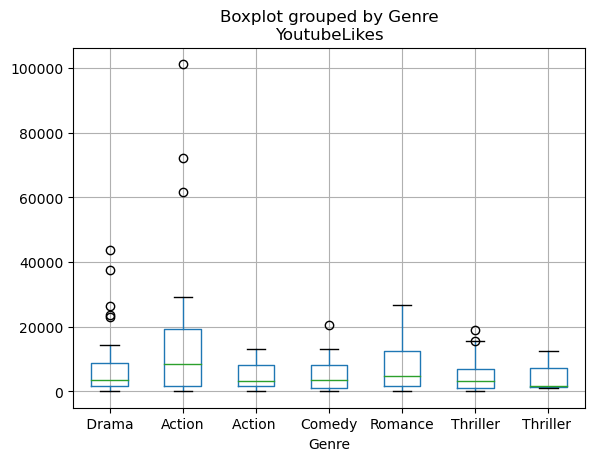

In [19]:
#Draw boxplots for each
df.boxplot(by = 'Genre', column = 'YoutubeLikes')

<Axes: >

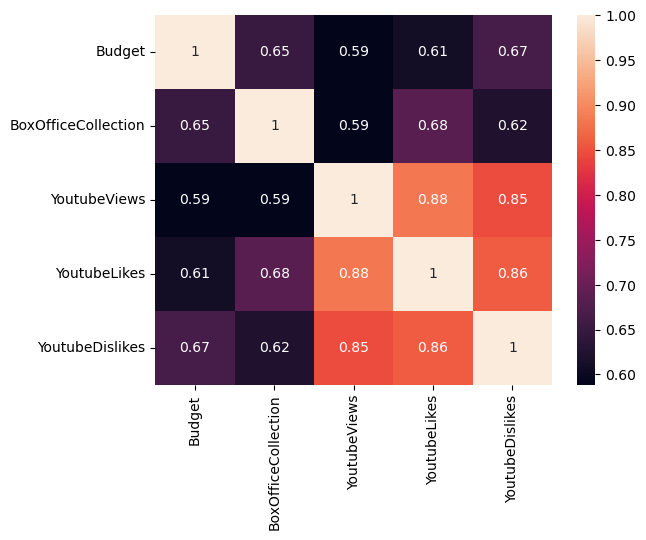

In [20]:
#Which of the variables among Budget, BoxOfficeCollection, YoutubeView,YoutubeLikes, YoutubeDislikes are highly correlated? Note: Draw pair plot orheatmap.
import seaborn as sns
correlation_matrix=df[['Budget','BoxOfficeCollection','YoutubeViews','YoutubeLikes','YoutubeDislikes']].corr()
sns.heatmap(correlation_matrix,annot=True)

<Axes: xlabel='Year', ylabel='BoxOfficeCollection'>

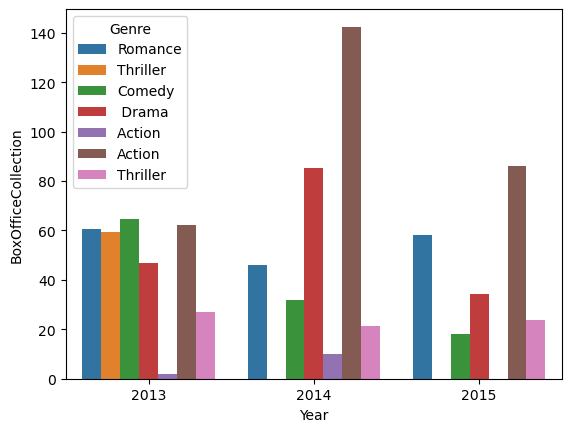

In [21]:
#12. During 2013−2015 period, highlight the genre of movies and their box officecollection? Visualize with best fit graph.
sns.barplot(x='Year',y='BoxOfficeCollection',data=df,hue='Genre',errorbar=None)

In [35]:
#sns.barplot(x='Budget',y='BoxOfficeCollection',data=df,hue='Genre',errorbar=None)

<Axes: xlabel='Genre', ylabel='Budget'>

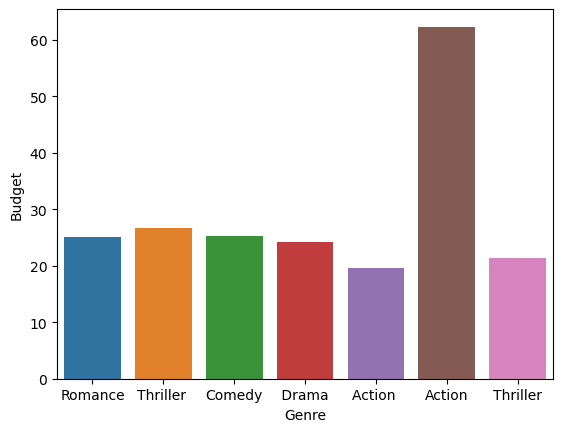

In [23]:
#14. Find the distribution of movie budget for every Genre..
sns.barplot(x='Genre',y='Budget',data=df,errorbar=None)

<Axes: xlabel='Year', ylabel='count'>

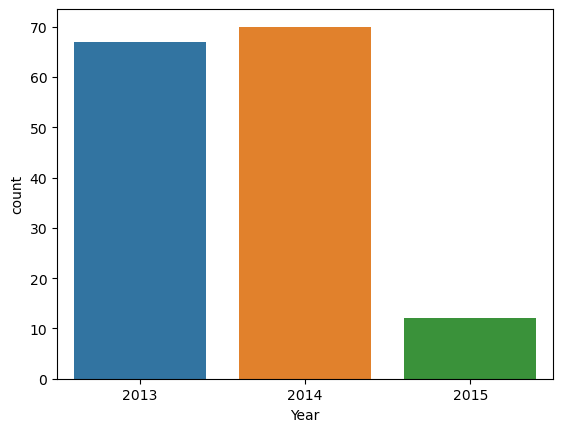

In [24]:
#During 2013−2015, find the number of movies released in every year. Also, visualizewith best fit graph.
sns.countplot(x='Year', data=df)